# Probability of market going up next day

### Wouldn't it be nice if we could predict with some degree of probability whether the stock market is going to go up tomorrow?

In [ ]:
### Business question and domain knowledge_ Explicamos
### Se trata de poder predecir la probabilidad que tenemos de que al día siguiente el mercado (índice S&P500) suba teniendo en cuenta los ciertos datos obtenidos hoy (features)


## 2. Dataset

### 2.1. Dependencies

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt

### 2.2 Import Dataset

In [6]:
df = pd.read_excel("Midproject_dataset_pre_alt.xlsx")

In [6]:
df.head(10)

,DATE,ES,AVG(5)[1],AVG(200)[1],RSI(2)[1],VIX[1],EUR-USD[1],10YR_IR[1],CRUDE OIL[1],NG[1],...,RSI(2),VIX,Change VIX,Change EUR-USD,Change 10YR_IR,Change CRUDE OIL,Change NG,Change GOLD,S&P500 RET,RET_LABEL
0,2004-10-13,1112.00,1129.00,1119.98500,25.759886,15.05,1.2324,112.828,52.51,6.636,...,14.202489,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
1,2004-10-14,1103.00,1122.80,1119.93625,8.580459,15.42,1.2342,113.094,53.64,6.851,...,25.759886,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,1
2,2004-10-15,1108.75,1117.05,1119.82375,3.952030,16.43,1.2384,113.531,54.76,6.803,...,8.580459,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
3,2004-10-18,1112.75,1114.40,1119.71875,43.141736,15.04,1.2470,113.219,54.93,6.709,...,3.952030,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,0
4,2004-10-19,1103.50,1111.75,1119.68125,63.731022,14.71,1.2493,113.234,53.67,6.806,...,43.141736,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0
5,2004-10-20,1101.50,1108.00,1119.55750,23.826584,15.13,1.2512,113.281,53.29,7.123,...,63.731022,14.71,0.028552,0.001521,-0.000415,-0.007080,0.046577,0.009579,-0.001812,1
6,2004-10-21,1108.25,1105.90,1119.45875,18.749832,14.85,1.2589,113.625,54.92,7.623,...,23.826584,15.13,-0.018506,0.006154,-0.003037,0.030587,0.070195,0.007590,0.006128,1
7,2004-10-22,1095.25,1106.95,1119.34500,66.676560,14.54,1.2613,113.578,54.47,7.697,...,18.749832,14.85,-0.020875,0.001906,0.000414,-0.008194,0.009707,0.001883,-0.011730,0
8,2004-10-25,1095.25,1104.25,1119.15500,20.377441,15.28,1.2682,113.734,55.17,8.105,...,66.676560,14.54,0.050894,0.005471,-0.001374,0.012851,0.053008,0.000000,0.000000,1
9,2004-10-26,1111.50,1100.75,1118.93750,20.377441,16.58,1.2806,113.891,54.54,7.890,...,20.377441,15.28,0.085079,0.009778,-0.001380,-0.011419,-0.026527,0.010103,0.014837,1


In [7]:
df.columns

Index(['DATE', 'ES', 'AVG(5)[1]', 'AVG(200)[1]', 'RSI(2)[1]', 'VIX[1]',
       'EUR-USD[1]', '10YR_IR[1]', 'CRUDE OIL[1]', 'NG[1]', 'GOLD[1]',
       'Change AVG(5)', 'C - AVG(200)', 'RSI(2)', 'VIX', 'Change VIX',
       'Change EUR-USD', 'Change 10YR_IR', 'Change CRUDE OIL', 'Change NG',
       'Change GOLD', 'S&P500 RET', 'RET_LABEL'],
      dtype='object')

In [ ]:
### Data cleaning is already performed through Excel---
### Try to do de data cleaning through Python in case we have got spare time in the end

### Data cleaning steps
### Data was retrieved from esignal service (all but gold) and from https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data  for gold prices
### Step 1: Each symbol consist of a pair columns (Date,Close). We retrieve all information for each symbol separately\n",
### Step 2: Each symbol different dates (they belong to different Exchanges and trading activity and trading hours/holidays might be different)
### Step 3: Date format need to be changed from (DTYYYYMMDD) to ((MM/DD/YYYY). Date is not important for the project but it is to align the different symbols sets
### Step 4: Technical Indicators on the underlying (AVG(5),AVG(200) & RSI) must be calculated from underlying data (S&P500)
### Step 5: All symbols must be joined/grouped in a single DataFrame accoriding to Date\n",
### Step 6: Transform Data: We are not interested on actual values of S&P500 but on whether it ahs gone up or down. We get return and then a categorical value for it
###  Up: 1 ; Down: 0\n",
### Step 7: Features need to be transformed: We are typically more interested in knowing how other markets have changed (their daily return) than in actual quotes
###        Sometimes there is important information on actual values (i.e VIX or RSI). I case of AVG(200) we just want to know if we are in a long term upside regime (1 or not 0)
### Step 8: VERY, VERY IMPORTANT!!!! 
    ##        Features must belong to prior date. We want to predict if TOMORROW the market is going to go up with TODAY´s information. So we need to make sure that all features information
    ##        has 1 day-lag (For each date , we have S&P500 return (up or down) for the day and features values must belong to yesterdays activity)

## 3. EDA

### 3.1 Stylized Facts

#### Stylized facts is like a specific EDA for asset returns time series. Asset returns typically show some statistical properties that do not appear in other areas
#### It is important to know them in order to build models



<br>

#### 0.-   S&P500 Returns
***

[Text(0.5, 1.0, 'S&P500 RETURNS'), Text(0, 0.5, 'Ret')]

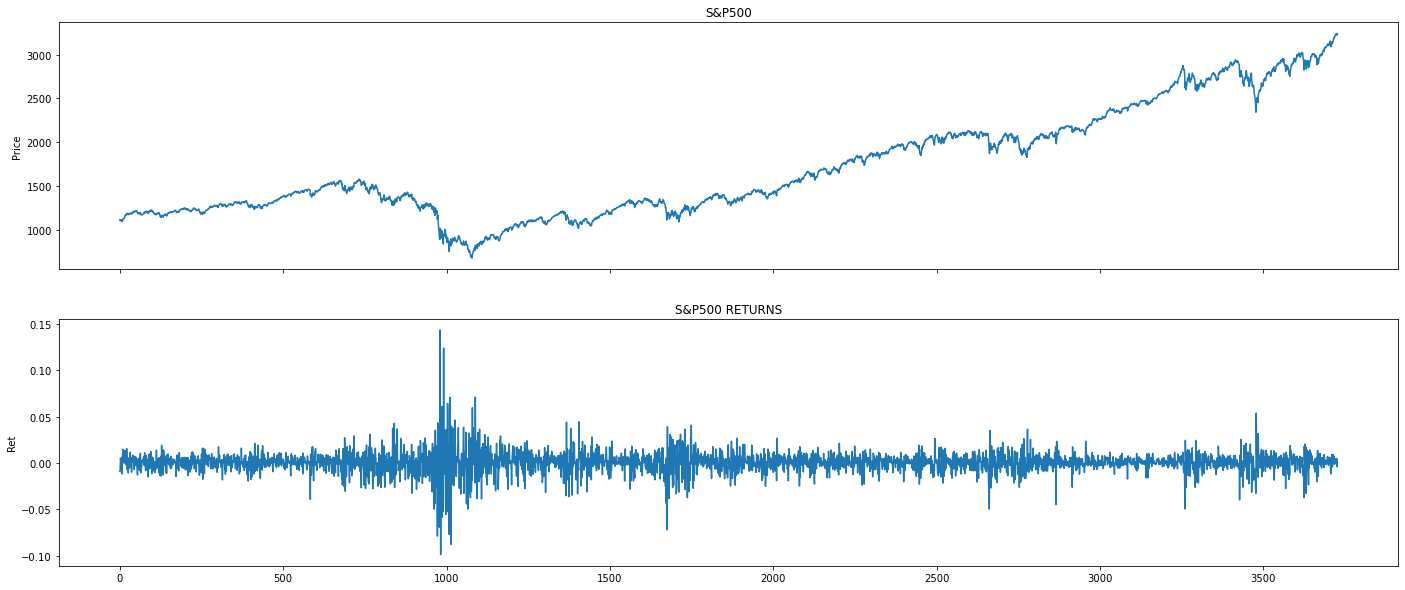

In [61]:
# Lets plot the S&P500 and its returns

fig,ax = plt.subplots(2,1,figsize=(24,10),sharex=True)
df.ES.plot(ax=ax[0])
ax[0].set(title='S&P500',ylabel = "Price")

df["S&P500 RET"].plot(ax=ax[1])
ax[1].set(title='S&P500 RETURNS',ylabel = "Ret")


<br>

#### 1.- Gaussian Returns?
***

In [10]:
ret = df['S&P500 RET']
rng =  np.linspace(min(ret),max(ret),num=1000)
mu = ret.mean()
sigma = ret.std()
norm_pdf = stats.norm.pdf(rng,loc=mu,scale=sigma)

In [8]:
# We plot the histogram & QQplot

C:\Users\cprieto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Q-Q plot')

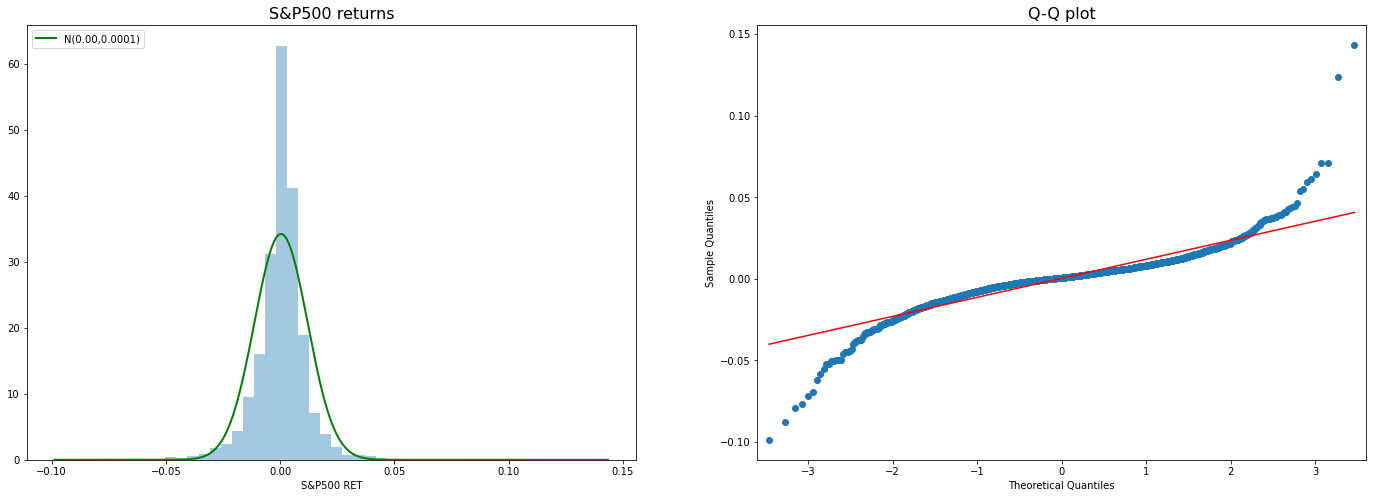

In [17]:
fig,ax = plt.subplots(1,2,figsize=(24,8))

# Histogram (subplot1):
sns.distplot(ret, kde=False,norm_hist=True,ax=ax[0])
ax[0].set_title("S&P500 returns",fontsize=16)
ax[0].plot(rng,norm_pdf,"g",lw=2,label=f'N({mu:.2f},{sigma**2:.4f})')
ax[0].legend(loc="upper left")

## Q-Q plot 
qq = sm.qqplot(ret.values,line='s',ax=ax[1])
ax[1].set_title('Q-Q plot',fontsize=16)

In [18]:
# Q-Qplot is clear, returns are not normally distributed. Fat tails

In [19]:
# Some analysis 
ret.describe()

count    3727.000000
mean        0.000352
std         0.011659
min        -0.098728
25%        -0.003950
50%         0.000702
75%         0.005460
max         0.143460
Name: S&P500 RET, dtype: float64

In [20]:
#Skewness and kurtosis of S&P500 returns. Jarque Bera test confirms returns do not follow a Normal distribution
print("Skewness:",ret.skew())
print("Kurtosis:",ret.kurtosis())
print(stats.jarque_bera(ret))

Skewness: 0.14185374989907534
Kurtosis: 16.7738402575522
Jarque_beraResult(statistic=43580.134860112856, pvalue=0.0)


In [21]:
# Accortding to mean, std, Skewness and kurtosis we can infere distribution is not normal. 
# Specifically we can see kurtosis as the main feature of this distribution : Fat tails
# Besides Jarque Bera normality test would make us reject distribution is normal at 99% level

# Therefore we can reject null hypothesis at the 99% confidence level since pvalue is 0.0 (<0.05). Returns on S&P500 are not normally distributed

<br>

#### Volatility clustering
***

<AxesSubplot:title={'center':'S&P 500 returns'}>

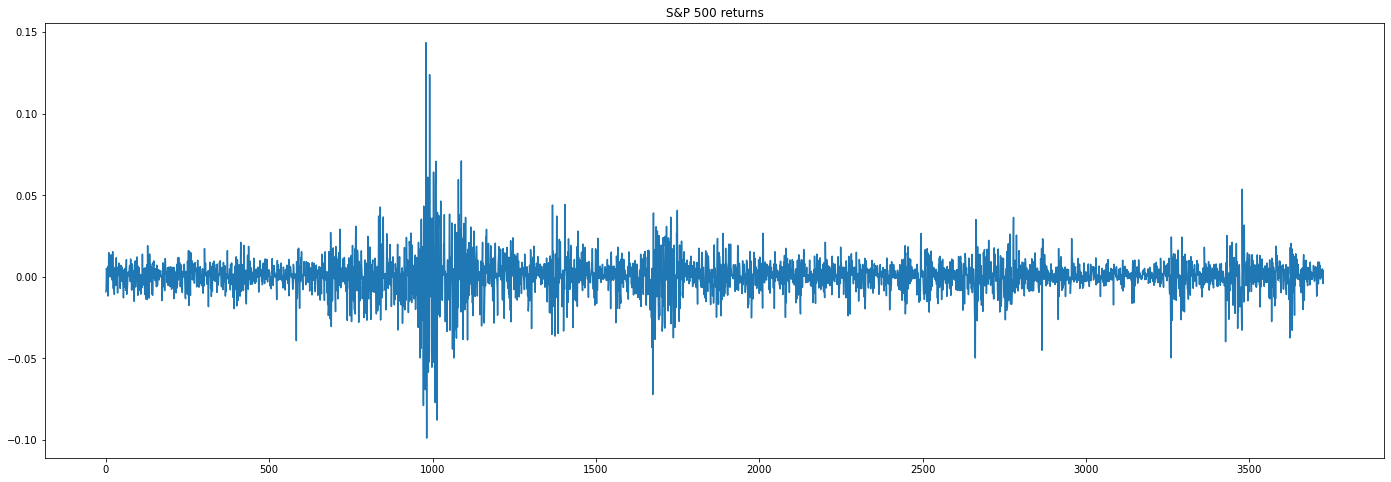

In [22]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
ret.plot(title="S&P 500 returns")

In [23]:
# Volatility seems to cluster (periods of high/low volatility in market returns tend to persist)....Conditional Heteroskedaticity

<br>

#### Autocorrelation in returns
***

In [25]:
# We now take a look to autocorrelation (How similar is a given time series to the lagged version of itself)
# Previous plot shows that returns tend to jump around zero and we see no persistent trends, this means little autocorrelation
# This are not good news for predicting future outcomes, there would be no way to make money if price follows a random walk
# Lets check this more visually through autocorrelation function (ACF)

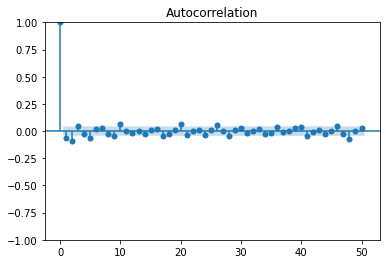

In [34]:
N_LAGS = 50
SIGNIFCANCE_LEVEL=0.01
acf = smt.graphics.plot_acf(ret,lags = N_LAGS,alpha=SIGNIFCANCE_LEVEL)

In [35]:
# Most of the values lie between the confidence interval. We can asume that there is no autocorrelation in the returns

<br>

#### Leverage effect
***

In [47]:
# Volatility measures as rolling standard deviations
df['moving_avg_std_252'] = df[["S&P500 RET"]].rolling(window=252).std()
df['moving_avg_std_21'] = df[["S&P500 RET"]].rolling(window=21).std()

<AxesSubplot:>

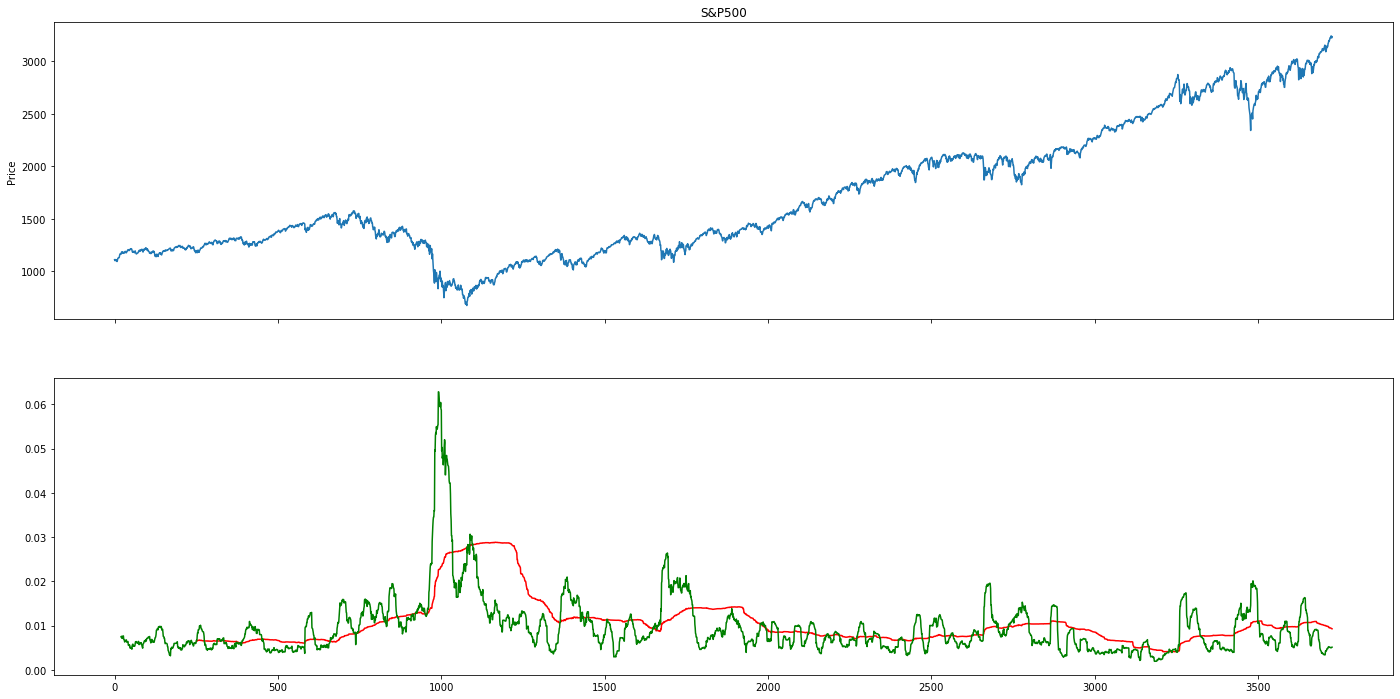

In [60]:
# Series

fig,ax = plt.subplots(2,1,figsize=(24,12),sharex=True)

df.ES.plot(ax=ax[0])
ax[0].set(title='S&P500',ylabel = "Price")

df['moving_avg_std_252'].plot(ax=ax[1],color='r',label = 'Moving Volatility 252d')
df['moving_avg_std_21'].plot(ax=ax[1],color='g',label = 'Moving Volatility 21d')


In [ ]:
# We see an important feature of financial time series: asset volatility is negatively correlated with returns.In this case we´re taking a look at realized volatility
# Asset returns volatility is typically considered as the "fear index", volatility increases when market drops, so it is typically negatively correlated to market returns